In [5]:
import pandas as pd
import numpy as np

lgb_df = pd.read_csv('best/lgb1917.csv')
cat_df = pd.read_csv('best/cat1929.csv')
ens_df = pd.read_csv('best/ens1967.csv')

print(lgb_df['target'])
print(cat_df['target'])
#print(ens_df['target'])


lgb_weight = 0.63
cat_weight = 0.37
#ens_weight = 0.33

ans = pd.DataFrame({})

ans['index'] = lgb_df['index']
#ans['target'] = (lgb_df['target'] * lgb_weight + cat_df['target'] * cat_weight + ens_df['target'] * ens_weight)
ans['target'] = (lgb_df['target'] * lgb_weight + cat_df['target'] * cat_weight)

print(ans['target'])

#ans[['index', 'target']].to_csv(f'custom_loss_mean_cv_lgb_cat_ens_{int(lgb_weight*100)}_{int(cat_weight*100)}_{int(ens_weight*100)}.csv', index=False)
ans[['index', 'target']].to_csv(f'custom_loss_mean_cv_lgb_cat_{int(lgb_weight*100)}_{int(cat_weight*100)}.csv', index=False)

0        1724.984743
1        1862.065188
2        1873.078740
3        2598.265693
4        4596.599238
            ...     
51764    3380.907108
51765    1926.256093
51766    1777.651624
51767    1712.984904
51768    2240.617805
Name: target, Length: 51769, dtype: float64
0        1582.086482
1        1818.717607
2        1853.126459
3        2347.643934
4        4539.049808
            ...     
51764    3081.587363
51765    1887.798080
51766    1864.634694
51767    1476.774826
51768    1416.976697
Name: target, Length: 51769, dtype: float64
0        1672.112387
1        1846.026583
2        1865.696396
3        2505.535642
4        4575.305949
            ...     
51764    3270.158803
51765    1912.026628
51766    1809.835360
51767    1625.587175
51768    1935.870595
Name: target, Length: 51769, dtype: float64


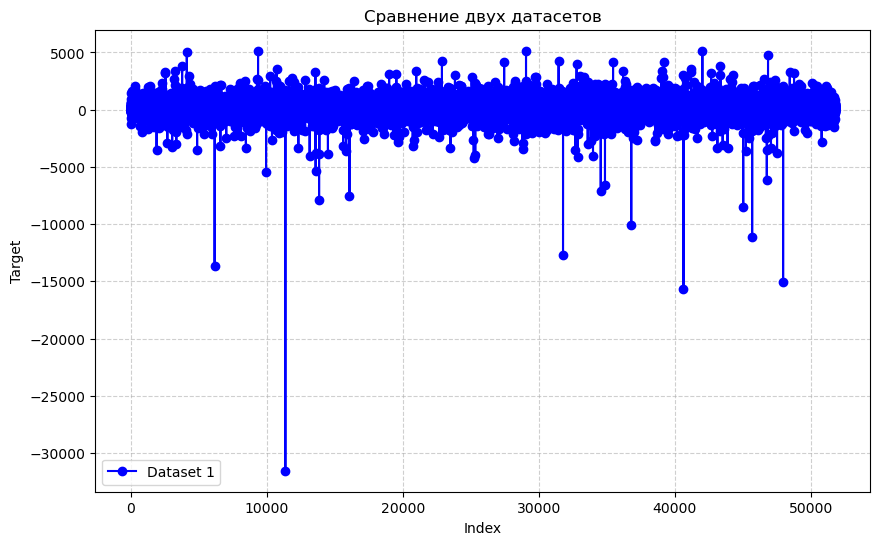

In [7]:
import matplotlib.pyplot as plt
import numpy as np  # для примера данных (если у вас уже есть датасеты, эту часть можно пропустить)

# Пример данных (замените на свои датасеты)
# Допустим, у нас есть два датасета с колонками 'index' и 'target'
df = lgb_df
df['lt'] = lgb_df['target']
df['ct'] = cat_df['target']
df = df.drop(columns=['target'])

df['diff'] = df['lt'] - df['ct']


# Создаём график
plt.figure(figsize=(10, 6))  # Размер изображения

# Рисуем первый датасет (точки + линии)
plt.plot(df['index'], df['diff'], marker='o', linestyle='-', color='blue', label='Dataset 1')

# Добавляем подписи
plt.xlabel('Index')
plt.ylabel('Target')
plt.title('Сравнение двух датасетов')
plt.legend()  # Показывает легенду
plt.grid(True, linestyle='--', alpha=0.6)  # Сетка для удобства

# Показываем график
plt.show()

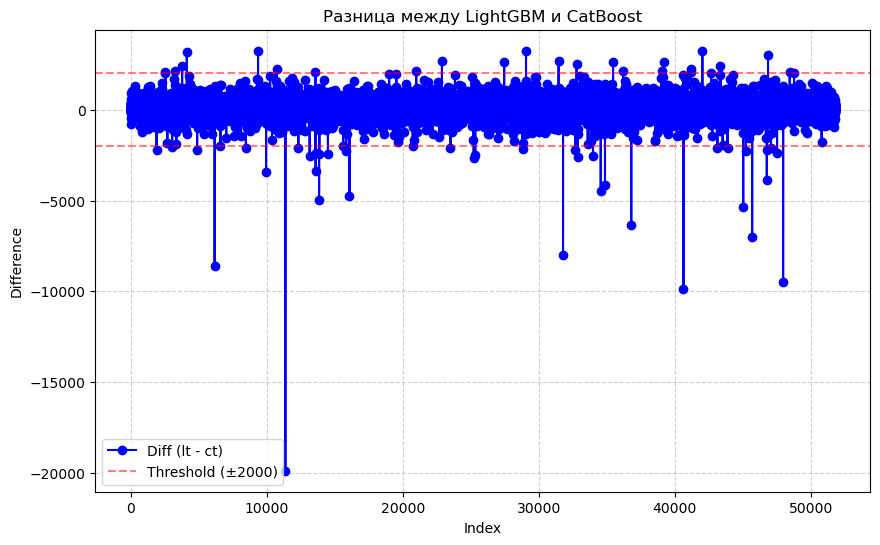

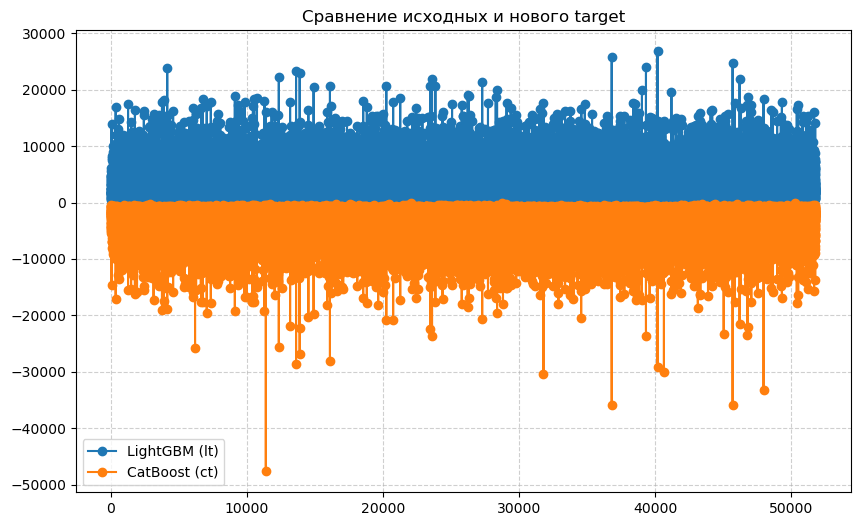

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

df = lgb_df.copy()
df['lt'] = lgb_df['target']  # LightGBM
df['ct'] = cat_df['target']  # CatBoost
df = df.drop(columns=['target'])

df['63_37'] = (df['lt'] * 0.63 + df['ct'] * 0.37) #Простой блендинг

df['diff'] = df['63_37'] - df['ct'] # Разница предсказаний

threshold = 2000

df['target'] = np.where(
    abs(df['diff']) > threshold,
    df['63_37'] * 0.20 + df['ct']  * 0.80, #Если больше порога
    #df['ct'] - (df['63_37'] - df['ct']) * 0.01,
    df['63_37'] #Если не больше порога
)

# Визуализация
plt.figure(figsize=(10, 6))

# График разницы
plt.plot(df['index'], df['diff'], marker='o', linestyle='-', color='blue', label='Diff (lt - ct)')

# Горизонтальные линии для порога
plt.axhline(y=threshold, color='red', linestyle='--', alpha=0.5, label=f'Threshold (±{threshold})')
plt.axhline(y=-threshold, color='red', linestyle='--', alpha=0.5)

# Подписи
plt.xlabel('Index')
plt.ylabel('Difference')
plt.title('Разница между LightGBM и CatBoost')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

# Можно также построить new_target vs исходные значения
plt.figure(figsize=(10, 6))
plt.plot(df['index'], df['lt'], 'o-', label='LightGBM (lt)')
plt.plot(df['index'], -1 * df['ct'], 'o-', label='CatBoost (ct)')
#plt.plot(df['index'], df['target'], 'o-', label='New Target', color='green', linewidth=2)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.title('Сравнение исходных и нового target')
plt.show()

In [43]:
df[df['diff'] > 2000]

,index,lt,ct,63_37,diff,target
2552,2552,10475.689178,7242.433801,9279.384689,2036.950887,7222.064293
2555,2555,8508.285630,5198.393945,7283.625707,2085.231762,5177.541627
3260,3260,12726.829096,9385.566569,11490.561961,2104.995392,9364.516615
3794,3794,12778.504605,8959.841515,11365.599261,2405.757747,8935.783937
4135,4135,23918.527646,18910.813527,22065.673422,3154.859895,18879.264928
9373,9373,16148.470299,11063.226136,14266.929959,3203.703823,11031.189098
10730,10730,18478.558563,14907.538093,17157.280989,2249.742896,14885.040664
13587,13587,8980.787160,5684.433736,7761.136393,2076.702657,5663.666710
20996,20996,10924.482510,7548.898534,9675.516439,2126.617905,7527.632355
22883,22883,14991.043850,10728.091595,13413.751515,2685.659921,10701.234995


In [44]:
df[['index', 'target']].to_csv('ahineja.csv', index=False)